In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [36]:
#Data
heart_data = pd.read_csv("./Resources/heart.csv")
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
# Define X and y values for training
X = heart_data.drop(["output"], axis=1)
y = heart_data["output"]

In [46]:
# Divide data into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1, stratify=y)
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3


In [47]:
# Import Random Forest model and fit to data
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=1)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

In [48]:
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3


In [49]:
x, y = (list(x) for x in zip(*sorted(zip(random_forest.feature_importances_, X_train.columns), reverse = True)))

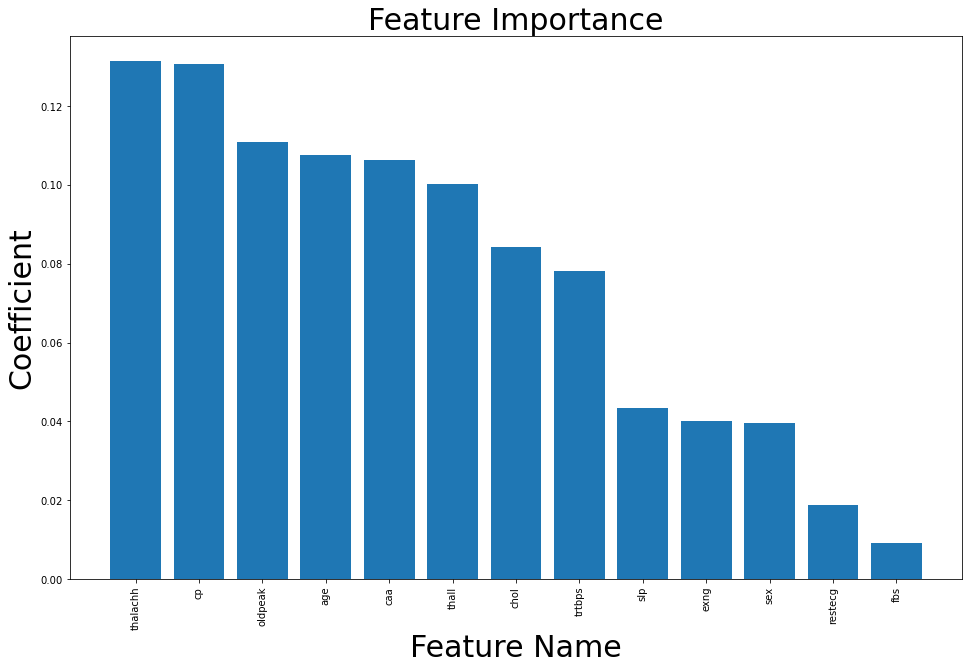

In [50]:
# Plot feature importance
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
plt.bar(y, x)
plt.title("Feature Importance", size=30)
plt.xlabel("Feature Name", size=30)
plt.ylabel("Coefficient", size=30)
plt.xticks(size=10, rotation=90)
plt.yticks(size=10)
plt.show()

In [51]:
# Grab important features for ML model
important_features = []
for name, importance in zip(X_train.columns, random_forest.feature_importances_):
    if importance > 0.06:
        important_features.append(name)

In [52]:
print(important_features)

['age', 'cp', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa', 'thall']


In [53]:
X_train = X_train.loc[:, important_features]
X_test = X_test.loc[:, important_features]

In [54]:
X_train

,age,cp,trtbps,chol,thalachh,oldpeak,caa,thall
70,54,2,120,258,147,0.4,0,3
42,45,0,104,208,148,3.0,0,2
239,35,0,126,282,156,0.0,0,3
37,54,2,150,232,165,1.6,0,3
159,56,1,130,221,163,0.0,0,3
...,...,...,...,...,...,...,...,...
196,46,2,150,231,147,3.6,0,2
191,58,0,128,216,131,2.2,3,3
275,52,0,125,212,168,1.0,2,3
192,54,0,120,188,113,1.4,1,3


In [55]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
X_train_scaled

array([[-0.06985215,  0.92131686, -0.72396017, ..., -0.5459007 ,
        -0.73434568,  1.11773181],
       [-1.0540448 , -0.99738889, -1.65013958, ...,  1.68998127,
        -0.73434568, -0.48812338],
       [-2.1475922 , -0.99738889, -0.37664289, ..., -0.88988254,
        -0.73434568,  1.11773181],
       ...,
       [-0.28856163, -0.99738889, -0.43452911, ..., -0.02992794,
         1.20398536,  1.11773181],
       [-0.06985215, -0.99738889, -0.72396017, ...,  0.31405391,
         0.23481984,  1.11773181],
       [ 0.36756681,  0.92131686, -1.59225336, ..., -0.37390978,
        -0.73434568,  1.11773181]])

In [14]:
# Import accuracy test and assign classifier to variable
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()

In [16]:
# Import randomized search to find best model
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [16]:
# Best model predictor
params = {"bootstrap": [True, False], 
          "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
          "max_features": ["auto", "sqrt"], 
          "min_samples_leaf": [1, 2, 3, 4],
          "min_samples_split": [2, 5, 10],
          "n_estimators": [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
         }
rf = RandomForestClassifier(random_state=0)
folds = 5
param_combo = 5
inner_cv = StratifiedKFold(n_splits = folds, shuffle=True, random_state=True)
outer_cv = StratifiedKFold(n_splits = folds, shuffle=True, random_state=True)
random_search = RandomizedSearchCV(rf, param_distributions=params, n_iter=param_combo, n_jobs=4, 
                                   cv=inner_cv.split(X_train_scaled, y_train), random_state=12, verbose=3)
random_search.fit(X_train_scaled, y_train)
print("best_estimator")
print(random_search.best_estimator_)
print("best_hyper_parameters")
print(random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
best_estimator
RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1000, random_state=0)
best_hyper_parameters
{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': False}


In [64]:
# Save best model predictor and test for accuracy
best_rf = RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1000, random_state=0)
model = best_rf.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print("accuracy: " + str(accuracy))
print("__________")

accuracy: 0.8289473684210527
__________


In [65]:
# Save model and scaler
filename = 'heart_attack_prediction_rfc_model.pkl'
joblib.dump(model, filename)
filename='scaler.pkl'
joblib.dump(scaler,filename)

['scaler.pkl']

# User Input Code

In [66]:
import joblib
scaler = joblib.load('scaler.pkl')
model = joblib.load('heart_attack_prediction_rfc_model.pkl')

In [69]:
model

RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1000, random_state=0)

In [71]:
X_train

,age,cp,trtbps,chol,thalachh,oldpeak,caa,thall
70,54,2,120,258,147,0.4,0,3
42,45,0,104,208,148,3.0,0,2
239,35,0,126,282,156,0.0,0,3
37,54,2,150,232,165,1.6,0,3
159,56,1,130,221,163,0.0,0,3
...,...,...,...,...,...,...,...,...
196,46,2,150,231,147,3.6,0,2
191,58,0,128,216,131,2.2,3,3
275,52,0,125,212,168,1.0,2,3
192,54,0,120,188,113,1.4,1,3


In [72]:
y_train

70     1
42     1
239    0
37     1
159    1
      ..
196    0
191    0
275    0
192    0
79     1
Name: output, Length: 227, dtype: int64

In [74]:
model.predict(scaler.transform(X_train.iloc[2,:].values.reshape(1,-1)))

array([0], dtype=int64)

In [21]:
while True:
    try:
        age = int(input('Insert the age of the patient: '))
        break
    except:
        print('Not a valid option')

Insert the age of the patient: 63


In [22]:
while True:
    try:
        sex = int(input('Insert the sex of the patient: 0 for female 1 for male'))
        break
    except:
        print('Not a valid option')

Not a valid option
Not a valid option
Not a valid option
Insert the sex of the patient: 0 for female 1 for male1


In [11]:
while True:
    try:
        cp = int(input('Insert the chest pain of the patient:(0, 1, 2, or 3) '))
        break
    except:
        print('Not a valid option')

Insert the chest pain of the patient:(0, 1, 2, or 3)  3


In [12]:
while True:
    try:
        tr = int(input('Insert the blood pressure level of the patient: (eg. 130)'))
        break
    except:
        print('Not a valid option')

Insert the blood pressure level of the patient: (eg. 130) 145


In [13]:
while True:
    try:
        chol = int(input('Insert the cholestoral level of the patient: (eg. 233)'))
        break
    except:
        print('Not a valid option')

Insert the cholestoral level of the patient: (eg. 233) 233


In [14]:
while True:
    try:
        fbs = int(input('Blood Pressure greater than 120?: 1 for true, 0 for false'))
        break
    except:
        print('Not a valid option')

Blood Pressure greater than 120?: 1 for true, 0 for false 1


In [15]:
while True:
    try:
        ecg = int(input('Electrocardiographic results: 1 for true, 0 for false '))
        break
    except:
        print('Not a valid option')

Electrocardiographic results: 1 for true, 0 for false  0


In [16]:
while True:
    try:
        chh = int(input('Insert maximum hear rate levels: (eg. 171)'))
        break
    except:
        print('Not a valid option')

Insert maximum hear rate levels: (eg. 171) 150


In [17]:
while True:
    try:
        exng = int(input('Induced angina? 1 for yes, 0 for no'))
        break
    except:
        print('Not a valid option')

Induced angina? 1 for yes, 0 for no 0


In [18]:
while True:
    try:
        peak = float(input('Previous Peak: (eg. 3.5)'))
        break
    except:
        print('Not a valid option')

Previous Peak: (eg. 3.5) 2.3


In [19]:
while True:
    try:
        slp = int(input('Slope (0 - 2)'))
        break
    except:
        print('Not a valid option')

Slope (0 - 2) 0


In [20]:
while True:
    try:
        caa = int(input('Number of Vessels (0 - 3)'))
        break
    except:
        print('Not a valid option')

Number of Vessels (0 - 3) 0


In [21]:
while True:
    try:
        thall = int(input('Thal Rate (0 - 3)'))
        break
    except:
        print('Not a valid option')

Thal Rate (0 - 3) 1


In [44]:
answers = [age, sex, cp, trtbps, chol, fbs, ecg, thal, exng, peak, slp, caa, thall]
data_scaled = scaler.transform(np.array(answers).reshape(1,-1))
prediction = model.predict(data_scaled)

In [45]:
prediction

array([1])